# Introduction to Tesseract

- It is an OCR(Optical Character Recognition) Engine
- It was started as a PhD project at Hewlett-Packard(HP) laboratories - scanner.
- After gaining popularit, it was developed by HP in 1984, The team worked until 1994.
- In 2005. it was released to the community as an open source project.
- In 2006, its development began to be sponsored by Google.
- Since 2006, its considered to be one of the best and most popular OCR tools.
- The first version only supported English.
- The second version supported Brazilian Portuguese, French, Italian, German and Dutch.
- The third version dramatically expanded support to include ideographic languages such as Japanese and Chinese, as well as right-to-left writing languages such as Arabic and Hebrew.
- The fourth supports over 100 languages for characters and symbols.
- Official Repo: https://github.com/tesseract-ocr/tesseract
- Pytesseract: https://pypi.org/project/pytesseract/

In [1]:
import pytesseract

import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

### Reading the image

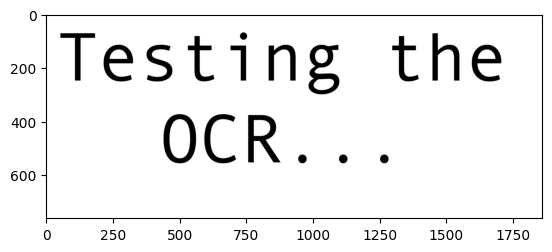

In [2]:
img = cv2.imread('/teamspace/studios/this_studio/exploring-ocr/understanding-ocr/images/test01.jpg')
plt.imshow(img)
plt.show()

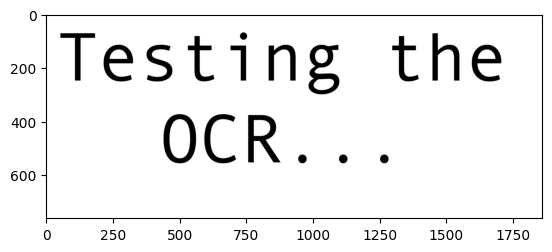

In [4]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [5]:
text = pytesseract.image_to_string(rgb)
text

'Testing the\nOCR...\n\x0c'

In [6]:
print(text)

Testing the
OCR...



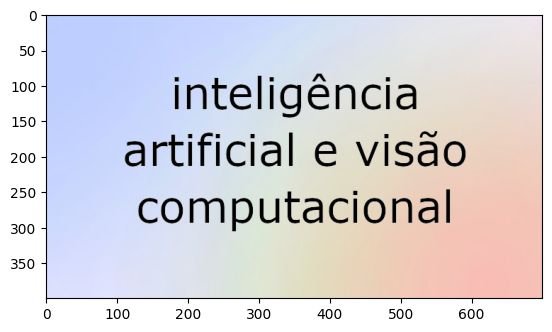

In [7]:
portuguese_img = cv2.imread('/teamspace/studios/this_studio/exploring-ocr/understanding-ocr/images/test02-02.jpg')
portuguese_img_rgb = cv2.cvtColor(portuguese_img, cv2.COLOR_BGR2RGB)
plt.imshow(portuguese_img_rgb)

In [8]:
text = pytesseract.image_to_string(portuguese_img_rgb)
print(text)

inteligéncia
artificial e visao
computacional



In [9]:
!tesseract --list-langs

List of available languages (2):
eng
osd


In [11]:
# Install portuguese language
!sudo apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 856 kB of archives.
After this operation, 1998 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-por all 1:4.00~git30-7274cfa-1 [856 kB]
Fetched 856 kB in 0s (5703 kB/s)          
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package tesseract-ocr-por.
(Reading database ... 64205 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-por_1%3a4.00~git30-7274cfa-1_all.deb ...
Unpacking tesseract-ocr-por (1:4.00~git30-7274cfa-1) ...
Setting up tesseract-ocr-por (1:4.00~git30-7274cfa-1) ...


In [13]:
text = pytesseract.image_to_string(portuguese_img_rgb, lang='por')
print(text)

inteligência
artificial e visão
computacional



### Page Segmentation Modes(PSM)

In [14]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


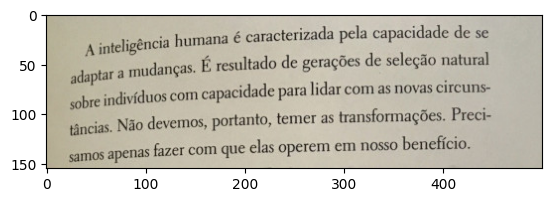

In [16]:
img = cv2.imread("/teamspace/studios/this_studio/exploring-ocr/understanding-ocr/images/page-book.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [23]:
text = pytesseract.image_to_string(rgb, lang='por', config="--psm 6")
print(text)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças É resultado de gerações de seleção natural
dobre indivíduos com capacidade para lidar com as novas circuns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
amos apenas fazer com que elas operem em nosso benefício.



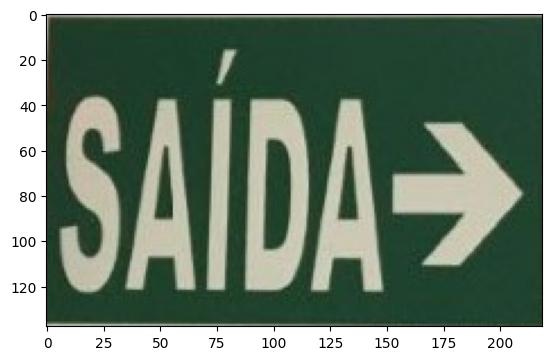

In [24]:
exit_img = cv2.imread('/teamspace/studios/this_studio/exploring-ocr/understanding-ocr/images/exit.jpg')
exit_img_rgb = cv2.cvtColor(exit_img, cv2.COLOR_BGR2RGB)
plt.imshow(exit_img_rgb)

In [29]:
text = pytesseract.image_to_string(exit_img_rgb, lang='por')
print(text)

es



### Page Orientation

In [30]:
from PIL import Image

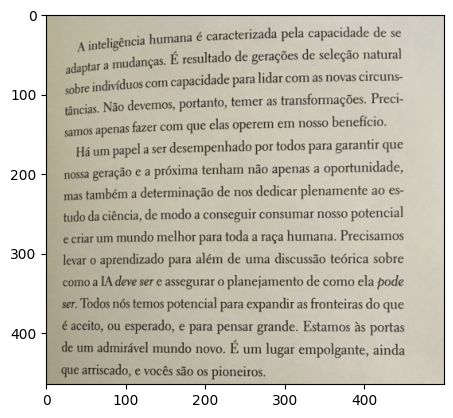

In [31]:
img = Image.open('/teamspace/studios/this_studio/exploring-ocr/understanding-ocr/images/book01.jpg')
plt.imshow(img);

In [32]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.66
Script: Latin
Script confidence: 13.33



### Selection of Texts

In [33]:
from pytesseract import Output

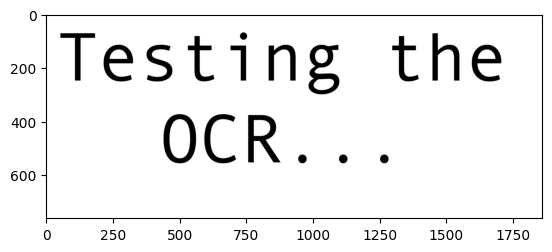

In [34]:
img = cv2.imread('/teamspace/studios/this_studio/exploring-ocr/understanding-ocr/images/test01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [35]:
result = pytesseract.image_to_data(rgb, lang='eng', output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 0, 1],
 'left': [0, 54, 54, 54, 54, 1298, 441, 441],
 'top': [0, 69, 69, 69, 69, 72, 375, 375],
 'width': [1859, 1652, 1652, 1652, 1046, 408, 843, 843],
 'height': [763, 489, 489, 231, 231, 180, 183, 183],
 'conf': [-1, -1, -1, -1, 95, 95, -1, 95],
 'text': ['', '', '', '', 'Testing', 'the', '', 'OCR...']}

- blovk_num = Current block number. When Tesseract performs the detections, it divides the image into several regions, which can vary according to the PSM parameters and also other criteria of the algorithm. Each block is region.
- conf = prediction confidence (from 0 - 100. -1 means no text was recognized)
- height = height of detected block of text(bounding box)
- left = x coordinate where the bounding box starts
- level = the level corresponds to the category of the detected block. There are 5 possible values:
    1. Page
    2. Block
    3. Paragraph
    4. line
    5. word
- line_num = line number (starts from 0)
- page_num = the index of the page where the item was detected
- text = the recognition result
- top = y-coordinate where the bounding box starts
- width = width of the current detected text block
- word_num = word_number (index) within the current block

In [42]:
def bounding_box(result, img, i, color = (255, 100, 0)):
    x = result['left'][i]
    y = result['top'][i]
    w = result['width'][i]
    h = result['height'][i]

    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    return x, y, img

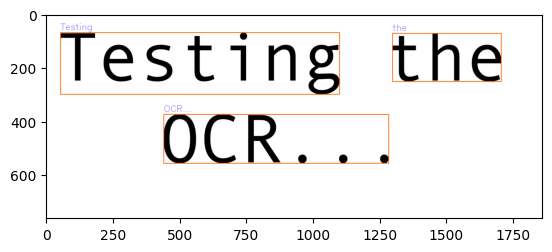

In [44]:
min_confidence = 80
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
    confidence = int(result['conf'][i])
    if confidence > min_confidence:
        x, y, img = bounding_box(result, img_copy, i)
        text = result['text'][i]
        cv2.putText(img_copy, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255))
plt.imshow(img_copy)

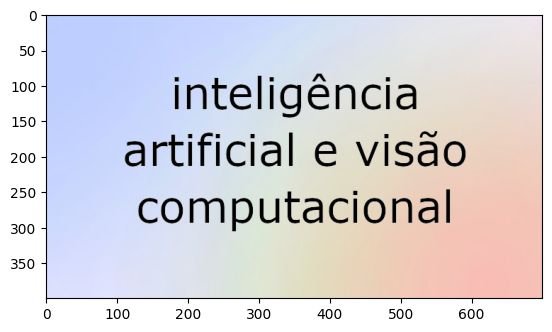

In [45]:
img = cv2.imread('/teamspace/studios/this_studio/exploring-ocr/understanding-ocr/images/test02-02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [46]:
result = pytesseract.image_to_data(rgb, lang='por', output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 4, 5, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1],
 'left': [0, 111, 111, 182, 182, 111, 111, 380, 437, 130, 130],
 'top': [0, 84, 84, 84, 84, 165, 167, 179, 165, 247, 247],
 'width': [700, 481, 481, 341, 341, 481, 237, 30, 155, 440, 440],
 'height': [400, 222, 222, 62, 62, 50, 48, 36, 50, 59, 59],
 'conf': [-1, -1, -1, -1, 96, -1, 95, 95, 95, -1, 96],
 'text': ['',
  '',
  '',
  '',
  'inteligência',
  '',
  'artificial',
  'e',
  'visão',
  '',
  'computacional']}

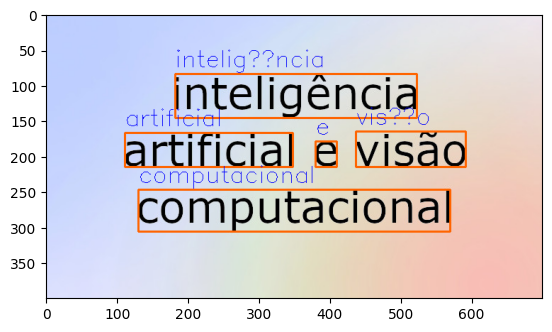

In [47]:
min_confidence = 80
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
    confidence = int(result['conf'][i])
    if confidence > min_confidence:
        x, y, img = bounding_box(result, img_copy, i)
        text = result['text'][i]
        cv2.putText(img_copy, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255))
plt.imshow(img_copy)

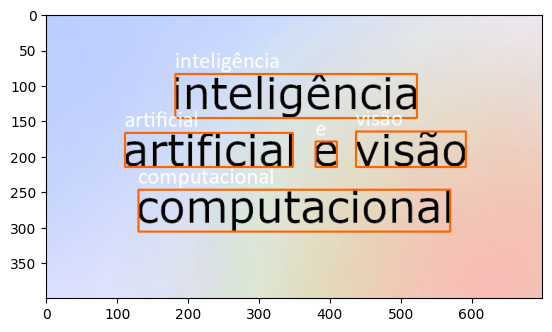

In [51]:
# Handling the Interrogation mark in above text
def write_text(text, x, y, img, font, font_size=32):
    font = ImageFont.truetype(font, font_size)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - font_size), text, font=font)
    img = np.array(img_pil)
    return img
img = cv2.imread('/teamspace/studios/this_studio/exploring-ocr/understanding-ocr/images/test02-02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result = pytesseract.image_to_data(rgb, lang='por', output_type=Output.DICT)
min_confidence = 80
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
    confidence = int(result['conf'][i])
    if confidence > min_confidence:
        x, y, img = bounding_box(result, img_copy, i)
        text = result['text'][i]
        # cv2.putText(img_copy, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255))
        img_copy = write_text(text, x, y, img_copy, font)
plt.imshow(img_copy)

In [48]:
from PIL import ImageFont, ImageDraw, Image
font = "/teamspace/studios/this_studio/exploring-ocr/understanding-ocr/images/calibri.ttf"

### Searching Specific Information

In [52]:
import re

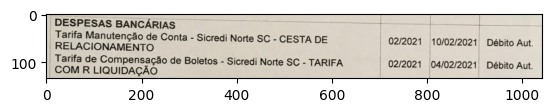

In [53]:
img = cv2.imread('/teamspace/studios/this_studio/exploring-ocr/understanding-ocr/images/table_test.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb);

In [54]:
result = pytesseract.image_to_data(rgb, lang='por', output_type=Output.DICT)
result

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

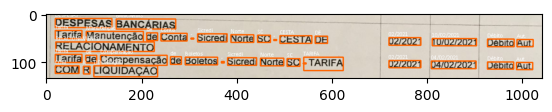

In [55]:
min_confidence = 80
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
    confidence = int(result['conf'][i])
    if confidence > min_confidence:
        x, y, img = bounding_box(result, img_copy, i)
        text = result['text'][i]
        # cv2.putText(img_copy, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255)) # Use if using English
        img_copy = write_text(text, x, y, img_copy, font, 12)
plt.imshow(img_copy)

In [56]:
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

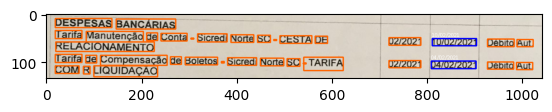

In [57]:
dates = []
min_confidence = 80
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
    confidence = int(result['conf'][i])
    if confidence > min_confidence:
        text = result['text'][i]
        if re.match(date_pattern, text):
            x, y, img = bounding_box(result, img_copy, i, (0, 0, 255))
        # cv2.putText(img_copy, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255)) # Use if using English
            img_copy = write_text(text, x, y, img_copy, font, 12)
            dates.append(text)
        else:
            x, y, img_copy = bounding_box(result, img_copy, i)
plt.imshow(img_copy)

In [58]:
dates

['10/02/2021', '04/02/2021']

### Detecting texts in natural scenarios

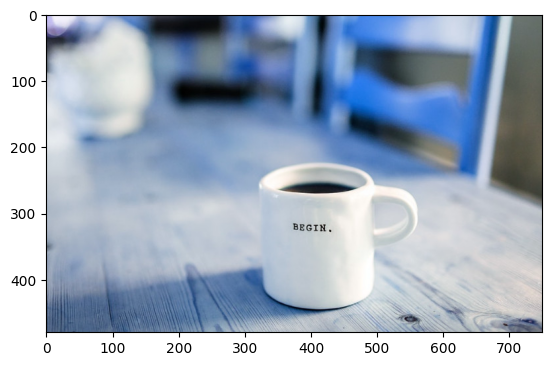

In [60]:
img = cv2.imread('/teamspace/studios/this_studio/exploring-ocr/understanding-ocr/images/cup.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

In [63]:
result = pytesseract.image_to_data(img, lang='eng', output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5],
 'page_num': [1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1],
 'word_num': [0, 0, 0, 0, 1],
 'left': [0, 0, 0, 0, 0],
 'top': [0, 0, 0, 0, 0],
 'width': [750, 750, 750, 750, 750],
 'height': [480, 480, 480, 480, 480],
 'conf': [-1, -1, -1, -1, 95],
 'text': ['', '', '', '', '']}

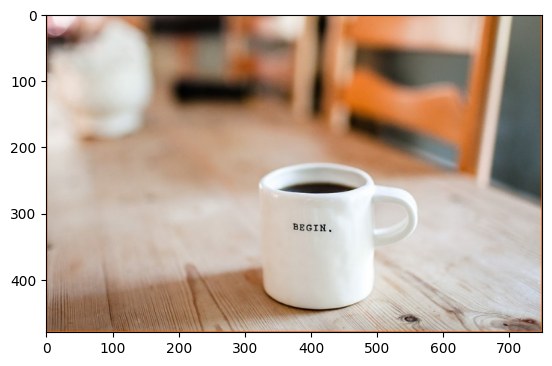

In [64]:
min_confidence = 80
img_copy = img.copy()
for i in range(0, len(result['text'])):
    confidence = int(result['conf'][i])
    if confidence > min_confidence:
        x, y, img = bounding_box(result, img_copy, i)
        text = result['text'][i]
        cv2.putText(img_copy, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 255)) # Use if using English
        # img_copy = write_text(text, x, y, img_copy, font, 12)
plt.imshow(img_copy)